# COMP0005 - GROUP COURSEWORK 2023-24
# Gesture Recognition via Convex Hull 

Use the cell below for all python code needed to realise the **Jarvis march algorithm** (including auxiliary data structures and functions needed by this algorithm - if any). The `jarvismarch()` function itself should take as input parameter a list of 2D points (`inputSet`), and return the subset of such points (`outputSet`) that lie on the convex hull.

In [147]:
import math

# find the orientation of three 2D points - to see if the rotation from points is counterclockwise or clockwise based on the middle point (p2)
def orientation(p1 : tuple[int,int],p2 : tuple[int,int] ,p3: tuple[int,int]) -> int:
        # find the difference of the gradients between p3 and p2, and p2 and p1, to check the orientation
        grad_diff = ((p3[1]-p2[1])*(p2[0]-p1[0])) - ((p2[1]-p1[1])*(p3[0]-p2[0]))
        
        # check if the orientation is counterclockwise (so return 1) - as we prefer the orientation to be counterclockwise in the Jarvis March algorithm.
        if grad_diff > 0:
                return 1
        # check if the orientation is clockwise (so return -1)
        elif grad_diff < 0:
                return -1
        # otherwise the orientation will be collinear (so return 0) - so there is no slope but a straight line
        else:
                return 0
def dist(p1 : tuple[int,int], p2: tuple[int,int]) -> float:
        return math.sqrt((p2[1]-p1[1])**2 +(p2[0]-p1[0])**2)
# tutorial: https://www.youtube.com/watch?v=nBvCZi34F_o
def jarvismarch(inputSet : list[tuple[int,int]]) -> list[tuple[int,int]]:
    '''
    Returns the list of points that lie on the convex hull (jarvis march algorithm)
            Parameters:
                    inputSet (list): a list of 2D points

            Returns:
                    outputSet (list): a list of 2D points
    '''
    # find the left-most point
    if len(inputSet) < 3:
        return inputSet
    if len(inputSet) == 3 and orientation(inputSet[0], inputSet[1], inputSet[2]) == 0:
        print("No convex hull printed as 3 points inputed and all 3 are collinear.")
    leftmostPoint = min(inputSet)
    outputSet = []
    while True:
        outputSet.append(leftmostPoint)
        next_point = inputSet[0]
        for point in inputSet:
                rotation = orientation(leftmostPoint, next_point, point)
                # check if the rotation is counterclockwise, where the first point is the next point in the hull, otherwise if rotation is collinear, then check the distance between the leftmost point and the next point, and if the distance is greater than the distance between the leftmost point and the current point, then the next point is the current point.
                if next_point == leftmostPoint or rotation == 1 or (rotation == 0 and dist(leftmostPoint, point) > dist(leftmostPoint,next_point)):
                        next_point = point
        
        # now check for the next point after finding the point that is on the convex hull                
        leftmostPoint = next_point
        # check if the algorithm returns back to the starting point and then end the loop, returning the coordinates of the hull.
        if leftmostPoint == outputSet[0]:
                # convex hull is complete
                break  

    #ADD YOUR CODE HERE

    return outputSet


Use the cell below for all python code needed to realise the **Graham scan** algorithm (including auxiliary data structures and functions needed by this algorithm - if any). The `grahamscan()` function itself should take as input parameter a list of 2D points (`inputSet`), and return the subset of such points that lie on the convex hull (`outputSet`).

In [34]:
# Graham Scan Algorithm is taken from Chapter 33 of Introduction to Algorithms (3rd Edition) by Cormen et al. (2009). Python implementation is based on the pseudocode provided in the book.

# function to get the polar angle between two points in 2D space - to determine the angle between the x-axis and the line segment connecting the two points, used for sorting the points in the graham scan algorithm.
def getPolarAngle(v1 : tuple[int, int], v2 : tuple[int, int]) -> float:
# calculate the polar angle
        polarAngle = math.atan2(v2[1] - v1[1], v2[0] - v1[0])
        
        # if the polar angle is negative, then add 2pi to the angle to make it positive, so it is in the range of 0 to 2pi (following polar coordinates convention).
        if polarAngle < 0:
                polarAngle += (2 * math.pi)
        
        return polarAngle

# function to get the distance between two points in 2D space.
def getDistance(v1 : tuple[int,int],v2 : tuple[int,int]) -> float:
    return math.sqrt((v2[0]-v1[0])**2 + (v2[1]-v1[1])**2)


# cross product is used to determine whether consctuive segments turn left or right or are collinear (straight).
def crossProduct(v1 : tuple[int,int], v2 : tuple[int,int], v3 : tuple[int,int]) -> float:
    # formula for cross product:
    # (p1 - p0) x (p2 - p0) = (x1 - x0)(y2 - y0) - (y1 - y0)(x2 - x0)
    # positive crossproduct means left turn at p1 (counterclockwise), negative value means right turn at p2 (clockwise), and 0 means collinear
    return (v2[0] - v1[0]) * (v3[1] - v1[1]) - (v2[1] - v1[1]) * (v3[0] - v1[0])

def grahamscan(inputSet : list[tuple[int,int]]) -> list[tuple[int,int]]:
    '''
    Returns the list of points that lie on the convex hull (graham scan algorithm)
            Parameters:
                    inputSet (list): a list of 2D points

            Returns:
                    outputSet (list): a list of 2D points
    '''
    # if the inputSet has less than 3 points, then return the inputSet as the convex hull
    if len(inputSet) < 3:
        return inputSet
    # find the point with the minimum y-coordinate or leftmost point in case of a tie
    p0 = min(inputSet, key=lambda x:(x[1], x[0]))

    """
    let p1, p2,...,pi be the remaining points in Q,
    sorted by polar angle in counterclockwise order around p0
    (if more than one point has the same angle, remove all but
    the one that is farthest from p0)
    """

    # Sort the points based on the polar angle, and if the polar angle is the same, then sort based on the furthest distance from p0 in the case of a tie, with a lambda function.
    inputSet = sorted(inputSet, key= lambda x: (getPolarAngle(p0, x), getDistance(p0, x)))

    # initialize a stack, outputSet, to store the vertices of the convex hull
    outputSet = [p0, inputSet[1], inputSet[2]]

    for i in range(3, len(inputSet)):
        # while the angle formed by points next-to-top(s), top(s) and p_i makes a nonleft turn, pop from stack
        while len(outputSet) > 1 and crossProduct(outputSet[-2], outputSet[-1], inputSet[i]) <= 0:
            outputSet.pop()
        outputSet.append(inputSet[i])
    return outputSet

grahamscan([(2,2),(5,1),(7,3),(2,-1),(-5,2),(6,3),(-1,52),(6,32)])

[(2, -1), (5, 1), (7, 3), (6, 32), (-1, 52), (-5, 2)]

Use the cell below for all python code needed to realise the **Chen's** algorithm (including auxiliary data structures and functions needed by this algorithm - if any). The `chen()` function itself should take as input parameter a list of 2D points (`inputSet`), and return the subset of such points that lie on the convex hull (`outputSet`).

In [176]:
"""
Algorithm from Optimal Output-Sensitive Convex Hull Algorithms in Two and Three Dimensions by Timothy M. Chan (1996)
Algorithm Hull2D(P, m, H), where P C E^2, 3 <= m <= n, and H >= 1
1. partition P into subsets P_1..... P_[n/m] each of size at most m
2. for i = 1,..., [n/m] do
3.      compute conv(Pi) by Graham's scan and store its vertices in an array
        in ccw order
4. P0 <- (0,-float('inf'))
5. P1 <- the rightmost point of P
6. for k = 1,...,H do
7.      for i = 1,...,[n/m] do
8.              compute the point q_i in P_i that maximizes angle between p_k-1, P_k and q_i (q_i =/= P_k)
                by performing a binary search on the vertices of conv(Pi)
9.      p_k+1 <- the point q from {q_1,.....,q_[n/m]}that maximizes angle between p_(k-1) and p_k q
10.     if p_k+1 = p_i then return the list (p_1..... p_k)
11. return incomplete
"""



# cross product is used to determine whether consctuive segments turn left or right or are collinear (straight).
def crossProduct(v1 : tuple[int,int], v2 : tuple[int,int], v3 : tuple[int,int]) -> int:
    # formula for cross product:
    # (p1 - p0) x (p2 - p0) = (x1 - x0)(y2 - y0) - (y1 - y0)(x2 - x0)
    # positive crossproduct means left turn at p2 (counterclockwise), negative value means right turn at p2 (clockwise), and 0 means collinear
    value = (v2[0] - v1[0]) * (v3[1] - v1[1]) - (v2[1] - v1[1]) * (v3[0] - v1[0])
    if value > 0:
            # left turn
        return 1
    elif value < 0:
            # right turn
        return -1
    else:
            # collinear
        return 0

# 
def dist(p1 : tuple[int,int], p2: tuple[int,int]) -> float:
        return math.sqrt((p2[1]-p1[1])**2 +(p2[0]-p1[0])**2)

# find the right tangent of a point in one of the subhulls. - taken from https://gist.github.com/tixxit/252229#file-chan-py-L45
def rightTangent(hull, p):
        left, right = 0, len(hull)-1
        left_prev = crossProduct(p, hull[0], hull[-1])
        left_next = crossProduct(p, hull[0], hull[(left+1) % right])
        while left < right:
                middle = (left + right) // 2
                middle_prev = crossProduct(p, hull[middle], hull[(middle-1) % len(hull)])
                middle_next = crossProduct(p, hull[middle], hull[(middle+1) % len(hull)])
                middle_side = crossProduct(p, hull[left], hull[middle])
                if middle_prev != -1 and middle_next != -1:
                        return middle
                elif middle_side == 1 and (left_next == -1 or left_prev == left_next) or middle_side == -1 and middle_prev == -1:
                        right = middle
                else:
                        left = middle + 1
                        left_prev = -middle_next 
                        # switch sides
                        left_next = crossProduct(p, hull[left], hull[(left+1) % len(hull)])
        return left

def min_index_pair(hulls):
    """Returns the hull, point index pair that is minimal."""
    h, p = 0, 0
    for i in range(len(hulls)):
        j = min(range(len(hulls[i])), key=lambda j: hulls[i][j])
        if hulls[i][j] < hulls[h][p]:
            h, p = i, j
    return (h, p)

def next_point_pair(hulls, pair):
    """
    Returns the (hull, point) index pair of the next point in the convex
    hull.
    """
    p = hulls[pair[0]][pair[1]]
    next = (pair[0], (pair[1] + 1) % len(hulls[pair[0]]))
    for h in (i for i in range(len(hulls)) if i != pair[0]):
        s = rightTangent(hulls[h], p)
        q, r = hulls[next[0]][next[1]], hulls[h][s]
        t = crossProduct(p, q, r)
        if t == -1 or t == 0 and dist(p, r) > dist(p, q):
            next = (h, s)
    return next

def chen(inputSet):
        '''
        Returns the list of points that lie on the convex hull (chen's algorithm)
                Parameters:
                        inputSet (list): a list of 2D points
        
                Returns:
                        outputSet (list): a list of 2D points
        '''
        m = 3
        if len(inputSet) < 3:
                return inputSet
        
        # note that h <= m <= h^2 for all h >= 1 in the algorithm - so we do not perform too many iterations - based on Wikipedia.
        h = min(2 ** (2**m), len(inputSet))
        
        subhulls = [grahamscan(inputSet[i:i+h]) for i in range(0, len(inputSet), h)]
        hull = [min_index_pair(subhulls)]
        for _ in range(h):
                p = next_point_pair(subhulls, hull[-1])
                if p == hull[0]:
                        return[subhulls[i][j] for i, j in hull]
                hull.append(p)
        return None
                
        """
        Chan's Algorithm with Linear Search:
        
        h = min(2 ** (2**m), len(inputSet))

        # Partition the inputset into subsets of size at most m using list slicing and list comprehension.
        subsets = [inputSet[i:i+h] for i in range(0, len(inputSet), h)]
        print("length of subsets: ", len(subsets))
        # Compute the convex hull of each subset using Graham's scan - store the vertices in an array in counterclockwise order
        subhulls = [grahamscan(subset) for subset in subsets]

        # Merge the subhulls using Jarvis's march
        outputSet = jarvismarch([point for subhull in subhulls for point in subhull])
        
        # check if the outputSet is less than or equal to h, then return the outputSet
        if len(outputSet) <= h:
                return outputSet 
        
        return None
        """
points = [(2,2),(5,1),(7,3),(2,-1),(-5,2),(6,3),(-1,52),(6,32)]
print(chen(points))

[(-5, 2), (2, -1), (5, 1), (7, 3), (6, 32), (-1, 52)]


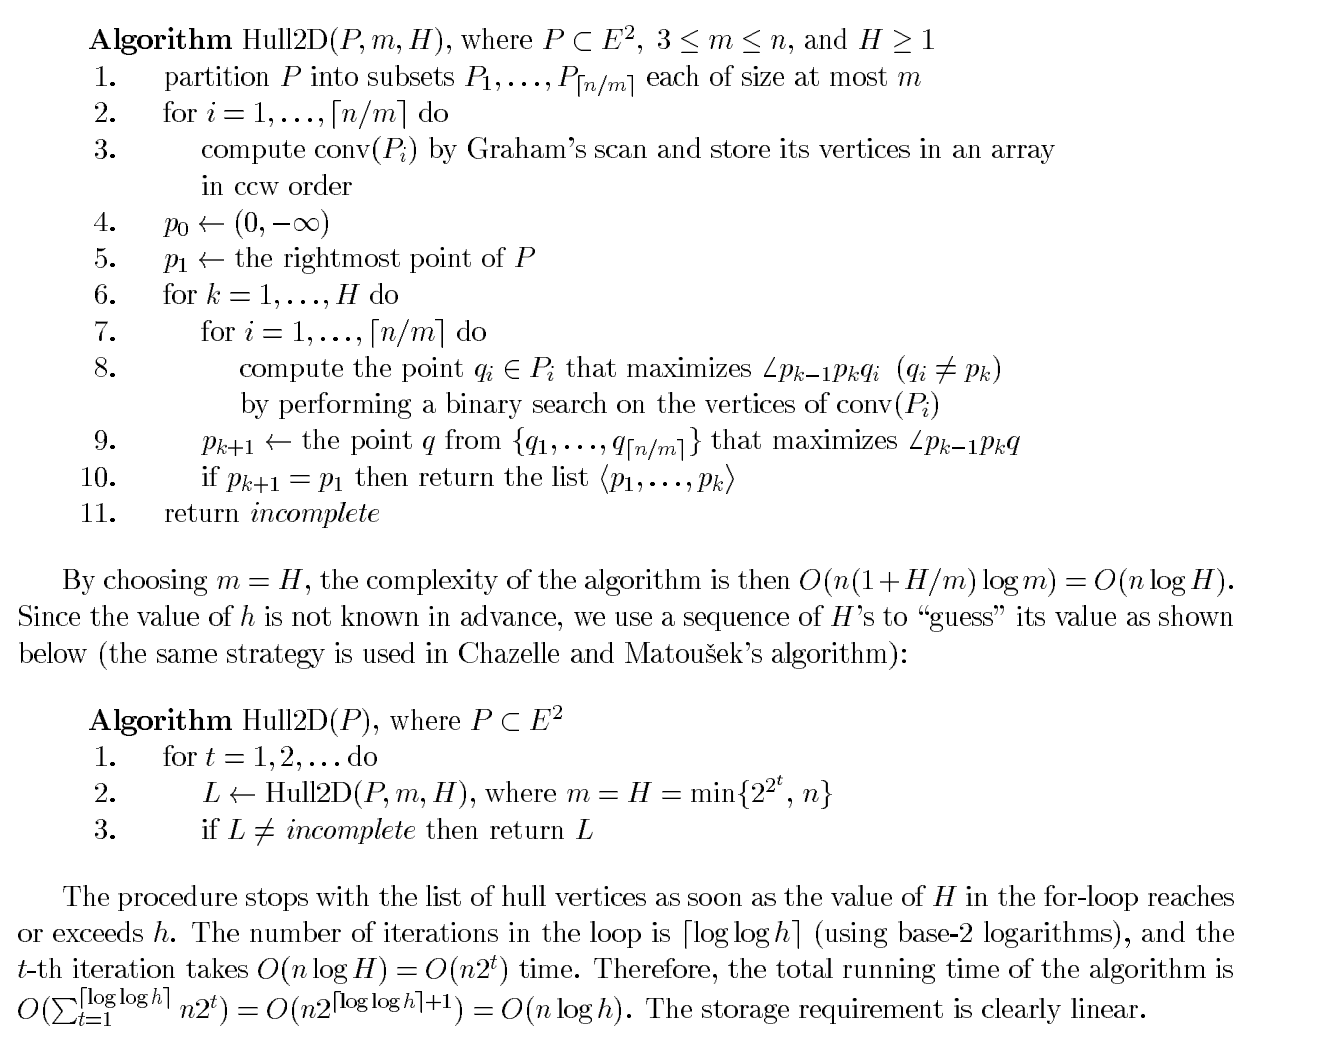

Use the cell below to implement the **synthetic data generator** needed by your experimental framework (including any auxiliary data structures and functions you might need - be mindful of code readability and reusability).

In [177]:
import random
import math

class TestDataGenerator():
    
    # constructor to initialize the number of points and the radius of the circle (optional) as the default radius is 16383 (half of the maximum value of 32767 for x and y coordinates).
    def __init__(self,num_points,radius=16383):
        self.num_points = num_points
        self.radius = radius
        
    # generate random points in 2D space
    def random_points(self):
        rand_points = []
        for _ in range(self.num_points):
            x = random.randint(0,32767)
            y = random.randint(0,32767)
            rand_points.append((x,y))
        return rand_points
    
    # generate polygon points, where the points are vertices of a polygon
    def generate_polygon_points(self, polygon_sides):
        if polygon_sides < 3:
            raise ValueError("A polygon must have at least 3 sides.")
        
        polygon_points = []
        centre_x = 16383
        centre_y = 16383

        for i in range(polygon_sides):
            angle = 2 * math.pi * i / polygon_sides
            x = int(round(centre_x + self.radius * math.cos(angle)))
            y = int(round(centre_y + self.radius * math.sin(angle)))
            polygon_points.append((x, y))

        return polygon_points
    
    # generate circle points, where the points are on the circumference of a circle - works about first 500-600 points due to rounding (that all the numbers had to be integers). If less than 20 points, it resembles a polygon.
    def generate_circle_points(self):
        circle_points = []
        centre_x = 16383
        centre_y = 16383

        for i in range(self.num_points):
            angle = 2 * math.pi * i / self.num_points
            x = int(round(centre_x + self.radius * math.cos(angle)))
            y = int(round(centre_y + self.radius * math.sin(angle)))
            circle_points.append((x, y))

        return circle_points
    
    # generate collinear points
    def generate_collinear_points(self):
        grad = random.randint(-5,10)
        x = 0
        y = 0
        if grad == 0:
            y = 16383
        elif grad > 0:
            y = 2
            x = 2
        else:
            y = 32765
            x = 2    

        rand_points = []
        for _ in range(self.num_points):
            rand_points.append((x,y))
            x += 1
            y += grad  # increment y by the gradient
        return rand_points
   
   
    # check if a point is inside a polygon - used for controlled point generation
    def point_inside_polygon(self, x, y, polygon_points):
        n = len(polygon_points)
        inside = False

        p1x, p1y = polygon_points[0]
        for i in range(n + 1):
            p2x, p2y = polygon_points[i % n]
            if y > min(p1y, p2y):
                if y <= max(p1y, p2y):
                    if x <= max(p1x, p2x):
                        if p1y != p2y:
                            x_intersects = (y - p1y) * (p2x - p1x) / (p2y - p1y) + p1x
                        if p1x == p2x or x <= x_intersects:
                            inside = not inside
            p1x, p1y = p2x, p2y

        return inside 
    # controlled point generation for testing (random points inside a polygon)
    def controlled_point_generation(self, polygon_sides):
        # check if the polygon has less than 3 sides or if number of points is smaller than number of polygon sides, then raise a ValueError, before generating the points.
        if polygon_sides < 3:
            raise ValueError("A polygon must have at least 3 sides.")
        elif self.num_points < polygon_sides:
            raise ValueError("The number of points must be greater than or equal to the number of sides of the polygon.")
        
        # number of points inside the shape
        number_of_points_in_shape = self.num_points - polygon_sides
        
        # Generate the vertices of the polygon
        vertices = self.generate_polygon_points(polygon_sides)
        # Compute the centroid of the polygon
        centroid = [sum(x) / len(x) for x in zip(*vertices)]

        points = []
        for _ in range(number_of_points_in_shape):
            # Generate a random angle
            angle = 2 * math.pi * random.random()

            # Generate a random radius
            radius = self.radius * math.sqrt(random.random())

            # Compute the coordinates of the point
            x = centroid[0] + radius * math.cos(angle)
            y = centroid[1] + radius * math.sin(angle)
            
            x = int(round(x))
            y = int(round(y))

            # Check if the point lies inside the polygon
            if self.point_inside_polygon(x, y, vertices):
                points.append((x, y))
        points += vertices
        return points 
        

Use the cell below to implement the requested **experimental framework** API.

In [178]:
import timeit
import matplotlib.pyplot as plt

class ExperimentalFramework():
    """
    A class to represent an experimental framework.

    ...

    Attributes
    ----------
    
    [to be defined as part of the coursework]

    Methods
    -------
    
    [to be defined as part of the coursework]

    """
        
    #ADD YOUR CODE HERE
    
    def __init__():
        self.data = TestDataGenerator()
        
    
    def test_algorithm():
        pass
    
    # function to run the tests
    def run_tests(trials : int, num_points :int , algorithms : list[str], type : str, polygon_sides : int = 0):
        pass

Use the cell below to illustrate the python code you used to **fully evaluate** the three convex hull algortihms under considerations. The code below should illustrate, for example, how you made used of the **TestDataGenerator** class to generate test data of various size and properties; how you instatiated the **ExperimentalFramework** class to  evaluate each algorithm using such data, collect information about their execution time, plots results, etc. Any results you illustrate in the companion PDF report should have been generated using the code below.

In [202]:
# ADD YOUR TEST CODE HERE 
# ADD YOUR TEST CODE HERE 
# Create an instance of TestDataGenerator
data_generator = TestDataGenerator(400)

# Call the generate_points() method
points = data_generator.controlled_point_generation(5)
print(points)

[(4706, 13725), (11971, 25462), (16853, 9647), (21439, 24943), (13724, 14117), (9797, 19746), (30660, 14942), (14774, 7010), (13655, 26252), (31927, 17446), (26854, 12288), (12181, 8711), (3196, 15372), (26171, 7836), (9232, 17804), (21054, 28268), (4820, 17823), (9476, 23054), (18974, 26320), (10125, 10185), (20721, 14301), (6149, 15593), (5262, 17933), (20079, 27360), (21030, 9121), (27254, 20458), (8450, 12139), (14891, 27063), (14302, 15969), (3701, 12968), (8023, 6506), (18853, 21077), (11935, 15224), (16857, 14599), (7751, 9094), (22125, 3041), (11507, 28290), (18127, 19988), (25629, 25999), (23612, 18558), (10942, 11826), (5801, 6200), (21460, 4935), (15134, 17293), (11929, 13614), (12492, 14101), (5203, 11782), (29851, 15872), (25508, 26122), (8654, 17458), (13803, 15418), (19552, 13828), (5713, 21372), (16688, 3710), (24119, 16109), (18633, 10300), (28429, 13906), (25943, 20031), (21012, 18709), (4730, 17868), (28617, 21003), (14696, 15661), (22960, 11086), (22483, 4307), (137

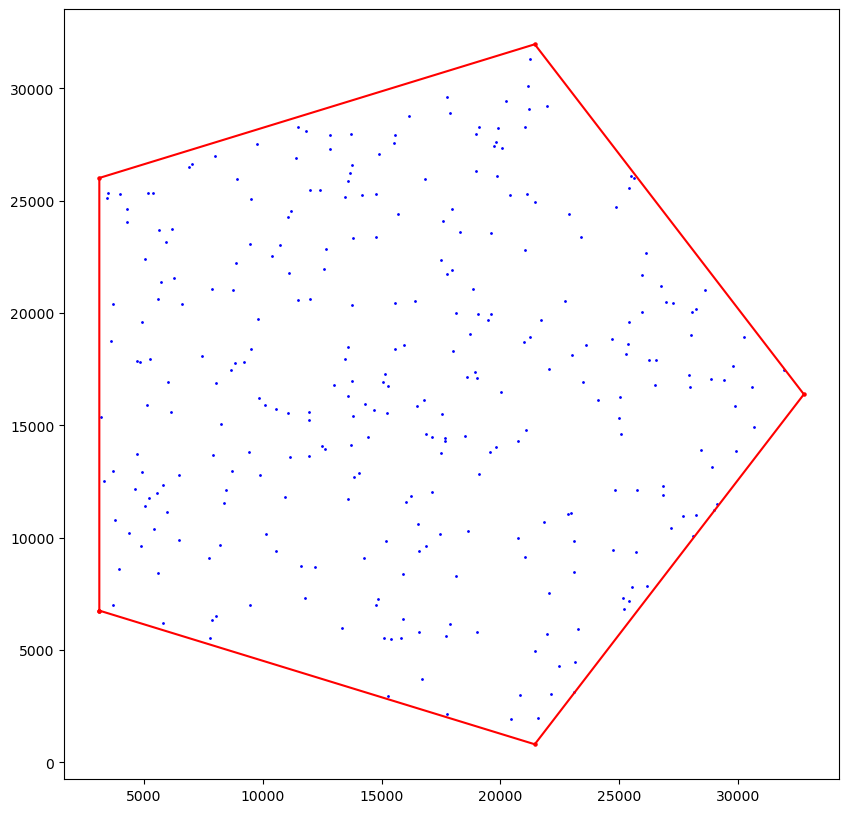

In [203]:
jarvis_march_points = jarvismarch(points)
jarvis_march_points.append(jarvis_march_points[0])

x = [i[0] for i in points]
y = [i[1] for i in points]

jarvis_x = [i[0] for i in jarvis_march_points]
jarvis_y = [i[1] for i in jarvis_march_points]

plt.scatter(x,y, color = 'blue', s = 1)
plt.scatter(jarvis_x, jarvis_y, color = 'red', s = 5)
plt.plot(jarvis_x, jarvis_y, color = 'red')
fig = plt.gcf()
fig.set_size_inches(10, 10)
"""plt.xlim(-100, 32869)
plt.ylim(-100, 32869)"""
plt.show()

[(21446, 802), (32766, 16383), (21446, 31964), (3129, 26013), (3129, 6753), (21446, 802)]


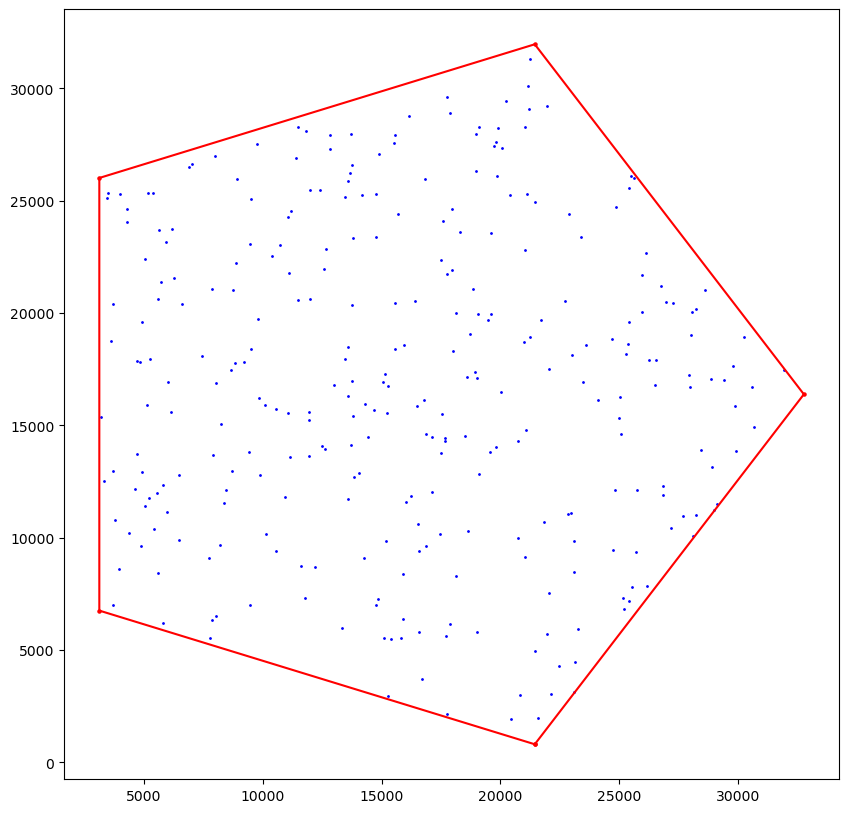

In [204]:
graham_points = grahamscan(points)
graham_points.append(graham_points[0])
print(graham_points)
x = [i[0] for i in points]
y = [i[1] for i in points]
graham_x= [i[0] for i in graham_points]
graham_y = [i[1] for i in graham_points]

plt.scatter(x,y, color = 'blue', s = 1)
plt.scatter(graham_x, graham_y, color = 'red', s = 5)
fig = plt.gcf()
fig.set_size_inches(10, 10)
"""plt.xlim(-100, 32869)
plt.ylim(-100, 32869)"""
plt.plot(graham_x, graham_y, color = 'red')

[(3129, 6753), (21446, 802), (32766, 16383), (21446, 31964), (3129, 26013)]


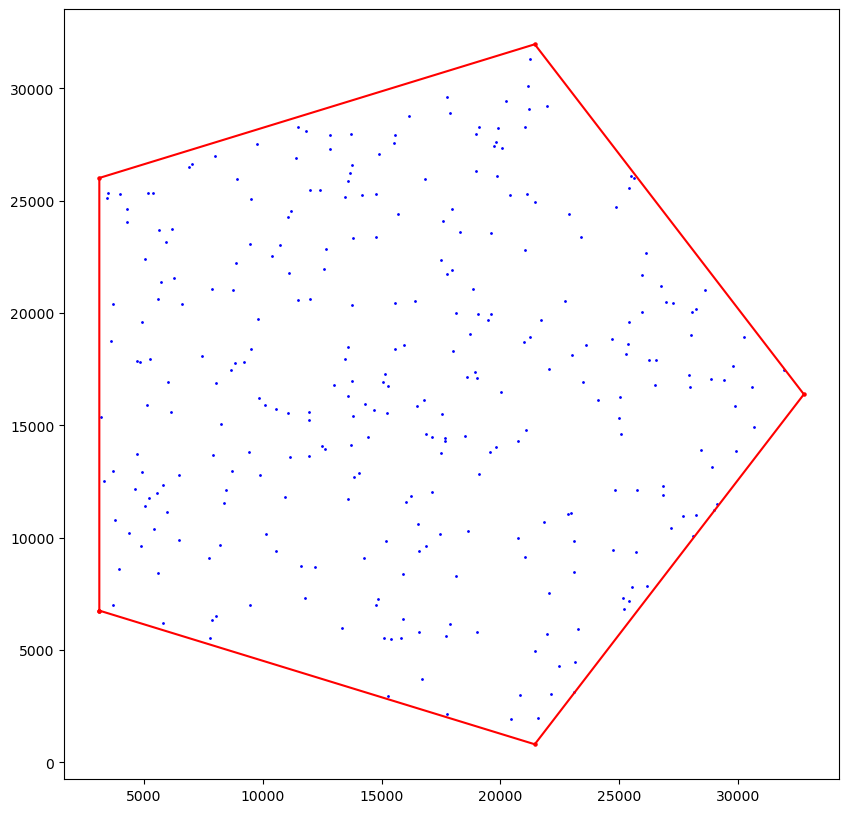

In [205]:
chan_points = chen(points)
print(chan_points)
chan_points.append(chan_points[0])
x = [i[0] for i in points]
y = [i[1] for i in points]
chan_x= [i[0] for i in chan_points]
chan_y = [i[1] for i in chan_points]
fig = plt.gcf()
fig.set_size_inches(10, 10)
"""plt.xlim(-100, 32869)
plt.ylim(-100, 32869)"""
plt.scatter(x,y, color = 'blue', s = 1)
plt.scatter(chan_x, chan_y, color = 'red', s = 5)
plt.plot(chan_x, chan_y, color = 'red')


In [206]:
print(len(jarvis_march_points) == len(graham_points))

True


In [207]:
print(len(jarvis_march_points))

6


In [208]:
len(chan_points)

6

In [209]:
len(graham_points)

6

In [223]:
def time_algorithm(algorithm, points):
    start = timeit.default_timer()
    algorithm(points)
    end = timeit.default_timer()
    return end - start

jarvis_times = []
graham_times = []
chan_times = []

    
def get_times(point_range):
    for i in point_range:
        data_generator = TestDataGenerator(i)
        points = data_generator.random_points()
        jarvis_times.append(time_algorithm(jarvismarch, points))
        graham_times.append(time_algorithm(grahamscan, points))
        chan_times.append(time_algorithm(chen, points))
    plt.plot(point_range, jarvis_times, label = "Jarvis March", color = 'red')
    plt.plot(point_range, graham_times, label = "Graham Scan", color = 'blue')
    plt.plot(point_range, chan_times, label = "Chan's Algorithm" , color = 'green')
    plt.legend()
    fig = plt.gcf()
    fig.set_size_inches(20.5, 20.5)
    plt.show()
        
def trials(point_range, n):
    jarvis_trials = []
    graham_trials = []
    chan_trials = []
    for j in point_range:
        jarvis_time = 0
        graham_time = 0
        chan_time = 0
        for i in range(n):
            data_generator = TestDataGenerator(j)
            points = data_generator.random_points()
            jarvis_time += time_algorithm(jarvismarch, points)
            graham_time += time_algorithm(grahamscan, points)
            chan_time += time_algorithm(chen, points)
        jarvis_trials.append(jarvis_time/n)
        graham_trials.append(graham_time/n)
        chan_trials.append(chan_time/n)
        
    plt.plot(point_range, jarvis_trials, label = "Jarvis March", color = 'red')
    plt.plot(point_range, graham_trials, label = "Graham Scan", color = 'blue')
    plt.plot(point_range, chan_trials, label = "Chan's Algorithm" , color = 'green')
    plt.legend()
    fig = plt.gcf()
    fig.set_size_inches(15,15)
    plt.show()
        
    
point_range = [i for i in range(10,100000,10000)]
trials(point_range, 5)



In [ ]:
framework = ExperimentalFramework()

framework.run_tests(h=10, n=100, algorithm=["jarvismarch", "grahamscan", "chen"], type="random")

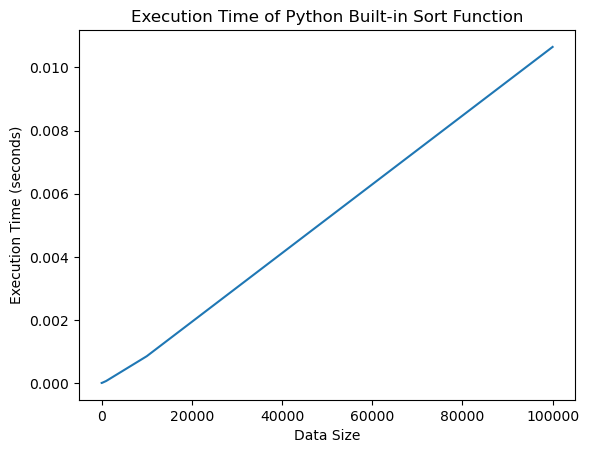

In [197]:
import timeit
import matplotlib.pyplot as plt

# Function to generate random data of different sizes
def generate_data(size):
    return list(range(size))

# Function to measure the execution time of the sort function
def measure_sort_time(data):
    setup_code = '''
from random import shuffle
data = {}
shuffle(data)
    '''.format(data)
    sort_time = timeit.timeit('sorted(data)', setup=setup_code, number=1)
    return sort_time

# Generate data sizes
data_sizes = [10, 100, 1000, 10000, 100000]

# Measure the execution time for each data size
sort_times = []
for size in data_sizes:
    data = generate_data(size)
    sort_time = measure_sort_time(data)
    sort_times.append(sort_time)

# Plot the graph
plt.plot(data_sizes, sort_times)
plt.xlabel('Data Size')
plt.ylabel('Execution Time (seconds)')
plt.title('Execution Time of Python Built-in Sort Function')
plt.show()
